In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('/kaggle/input/cat-in-the-dat/train.csv', index_col='id')

In [3]:
train_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,T,N,Red,Trapezoid,Snake,India,Oboe,...,e027decef,1,Contributor,Freezing,k,K,dh,3,8,0
299996,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,Piano,...,80f1411c8,2,Novice,Freezing,h,W,MO,3,2,0
299997,0,0,0,F,Y,Blue,Star,Axolotl,Russia,Oboe,...,314dcc15b,3,Novice,Boiling Hot,o,A,Bn,7,9,1


1. Binary\
bin_0 ~ bin_2 : 0/1
bin_3 : T/F
bin_r : Y/N
2. Nominal\
nom_0 ~ nom_9 확인필요 (unique)
3. Ordinal\
ord_0 : int
ord_1 ~ ord_5 : 확인필요 (unique)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   bin_0   300000 non-null  int64 
 1   bin_1   300000 non-null  int64 
 2   bin_2   300000 non-null  int64 
 3   bin_3   300000 non-null  object
 4   bin_4   300000 non-null  object
 5   nom_0   300000 non-null  object
 6   nom_1   300000 non-null  object
 7   nom_2   300000 non-null  object
 8   nom_3   300000 non-null  object
 9   nom_4   300000 non-null  object
 10  nom_5   300000 non-null  object
 11  nom_6   300000 non-null  object
 12  nom_7   300000 non-null  object
 13  nom_8   300000 non-null  object
 14  nom_9   300000 non-null  object
 15  ord_0   300000 non-null  int64 
 16  ord_1   300000 non-null  object
 17  ord_2   300000 non-null  object
 18  ord_3   300000 non-null  object
 19  ord_4   300000 non-null  object
 20  ord_5   300000 non-null  object
 21  day     300000 non-null  int64 
 22  m

In [4]:
binary_features = [f'bin_{i}' for i in range(5)]
nominal_features = [f'nom_{i}' for i in range(10)]
ordinal_features = [f'ord_{i}' for i in range(6)]
binary_features, nominal_features, ordinal_features

(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'],
 ['nom_0',
  'nom_1',
  'nom_2',
  'nom_3',
  'nom_4',
  'nom_5',
  'nom_6',
  'nom_7',
  'nom_8',
  'nom_9'],
 ['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5'])

In [51]:
train_data.shape

(300000, 24)

In [5]:
drop_cols = []

In [6]:
for feature in nominal_features:
    unique_features = train_data[feature].unique()
    print(len(unique_features))
    if len(unique_features) > 15:
        drop_cols.append(feature)
print(drop_cols)

3
6
6
6
4
222
522
1220
2215
11981
['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']


In [7]:
train_data = train_data.drop(columns=drop_cols)

In [8]:
nominal_features = [f'nom_{i}' for i in range(5)]

In [9]:
for feature in nominal_features:
    print(pd.crosstab(train_data[feature], train_data['target'], normalize='index')*100)

target          0          1
nom_0                       
Blue    75.820976  24.179024
Green   67.285478  32.714522
Red     64.894827  35.105173
target             0          1
nom_1                          
Circle     75.434084  24.565916
Polygon    68.453089  31.546911
Square     66.106821  33.893179
Star       68.937348  31.062652
Trapezoid  70.994554  29.005446
Triangle   63.902194  36.097806
target           0          1
nom_2                        
Axolotl  68.098295  31.901705
Cat      66.463280  33.536720
Dog      75.486059  24.513941
Hamster  64.079086  35.920914
Lion     70.691544  29.308456
Snake    69.283803  30.716197
target              0          1
nom_3                           
Canada      66.020700  33.979300
China       68.827643  31.172357
Costa Rica  68.531177  31.468823
Finland     75.718694  24.281306
India       63.868857  36.131143
Russia      71.004618  28.995382
target            0          1
nom_4                         
Bassoon   76.225748  23.774252
Ob

[('nom_0', 'nom_1'), ('nom_0', 'nom_2'), ('nom_0', 'nom_3'), ('nom_0', 'nom_4'), ('nom_1', 'nom_2'), ('nom_1', 'nom_3'), ('nom_1', 'nom_4'), ('nom_2', 'nom_3'), ('nom_2', 'nom_4'), ('nom_3', 'nom_4')]
nom_1  Circle  Polygon  Square   Star  Trapezoid  Triangle
nom_0                                                     
Blue    11924    11623   16057  14634      32357      9571
Green   15825    15406   20926  19503      42940     12741
Red      9571     9114   12614  11767      25884      7543
nom_2  Axolotl    Cat    Dog  Hamster   Lion  Snake
nom_0                                              
Blue     11657  15981  12062     9645  32198  14623
Green    15226  20977  15872    12486  43238  19542
Red       9253  12701   9510     7356  25859  11814
nom_3  Canada  China  Costa Rica  Finland  India  Russia
nom_0                                                   
Blue    15997  14590       11579    11827   9719   32454
Green   21134  19737       15269    15836  12557   42808
Red     12820  1

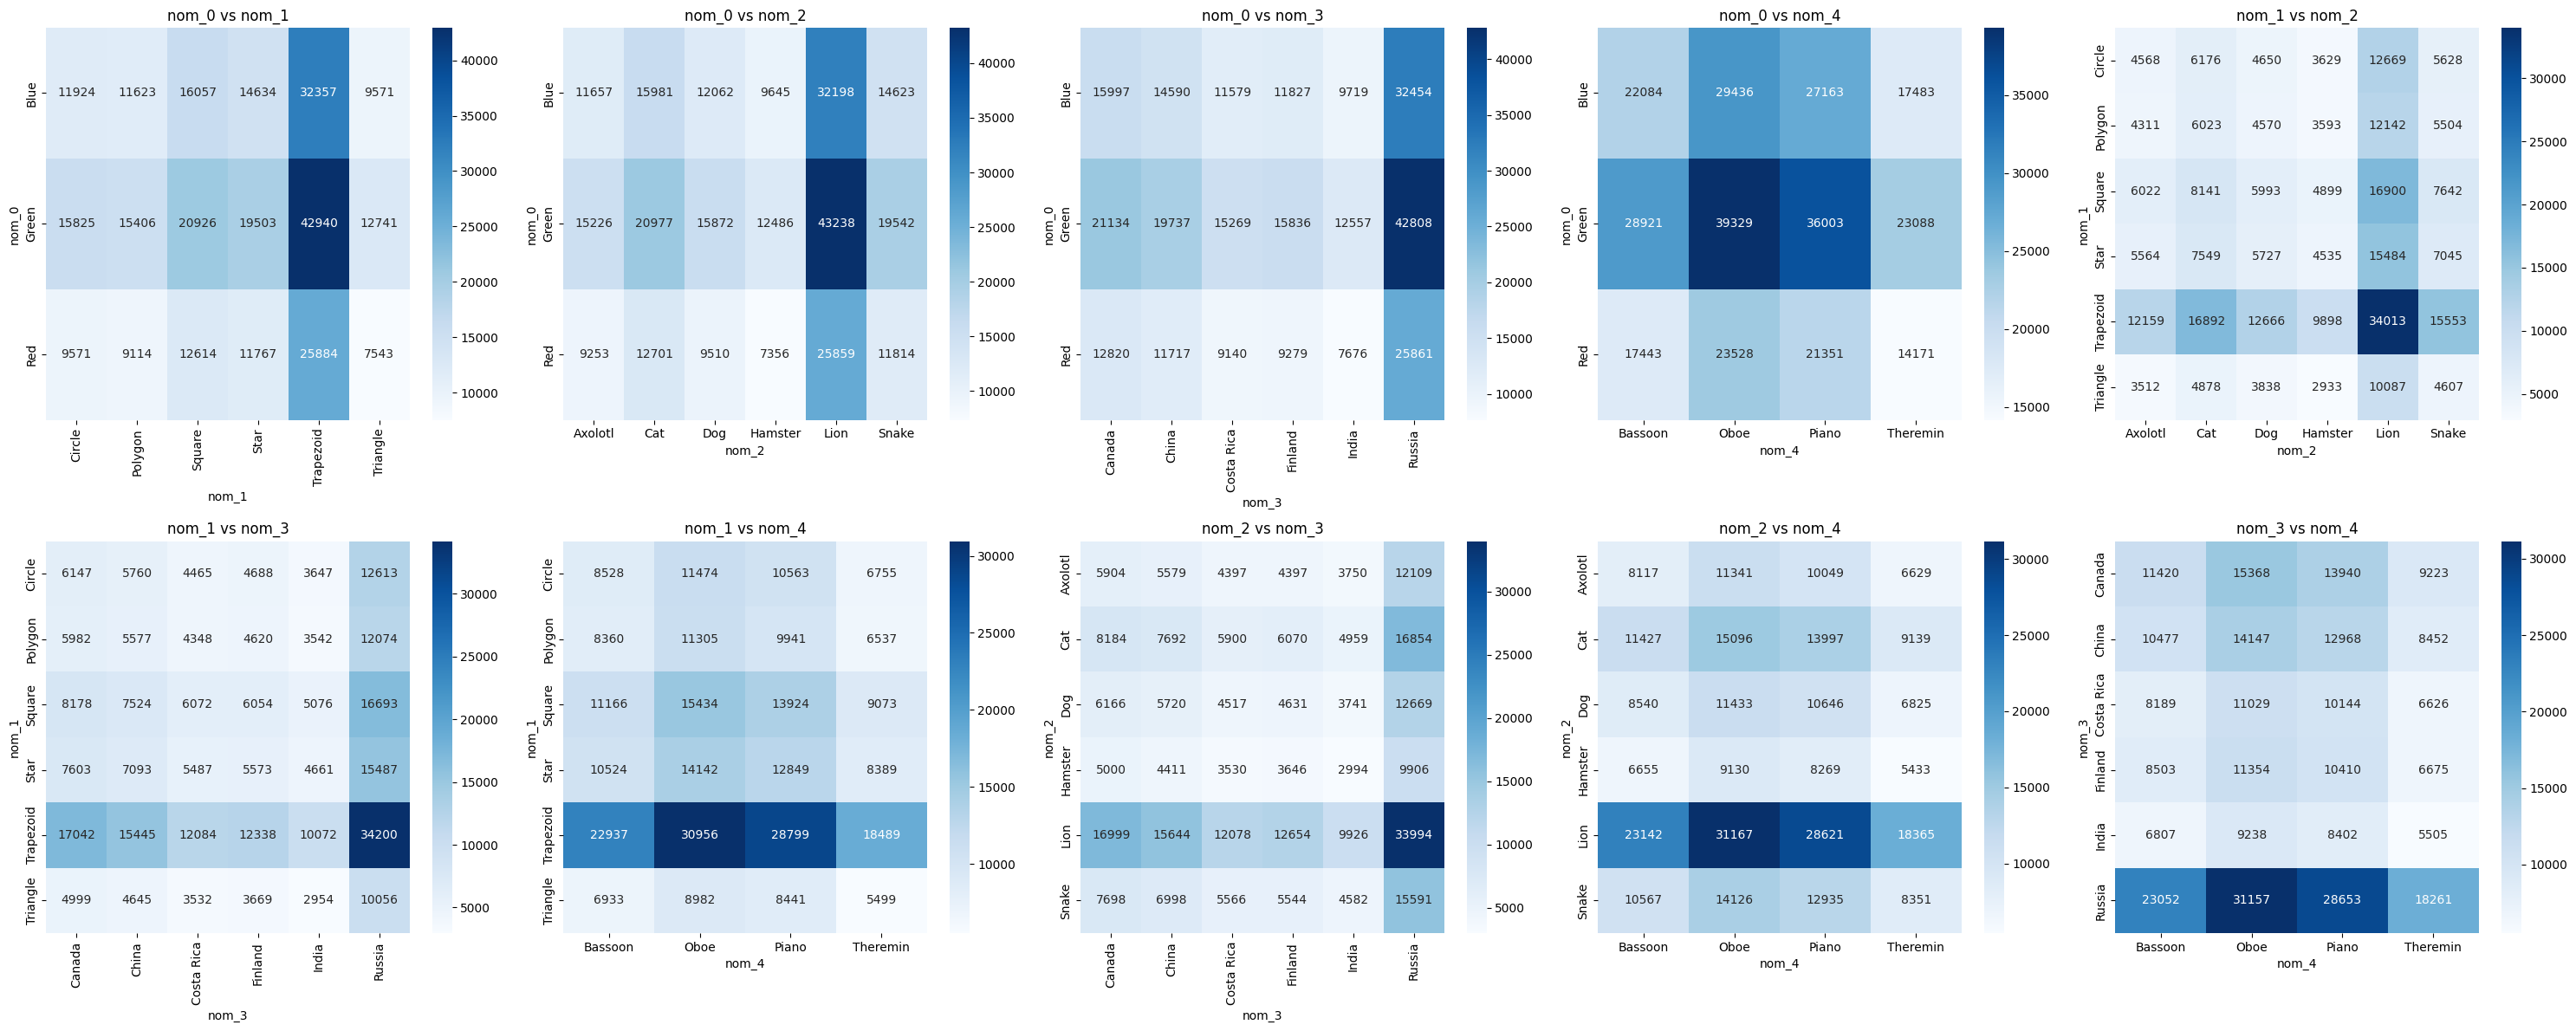

In [89]:
from itertools import combinations 
# 5 x 4 / 2 = 10가지
nominal_combinations = list(combinations(nominal_features, 2))
print(nominal_combinations)

fig, axes = plt.subplots(2, 5, figsize=(30, 12))

for i, (f1, f2) in enumerate(nominal_combinations):
    contingency_tab = pd.crosstab(train_data[f1], train_data[f2])
    print(contingency_tab)
    sns.heatmap(contingency_tab, annot=True, cmap='Blues', fmt='d', ax=axes.flat[i])
    axes.flat[i].set_title(f'{f1} vs {f2}')
plt.tight_layout()
plt.show()

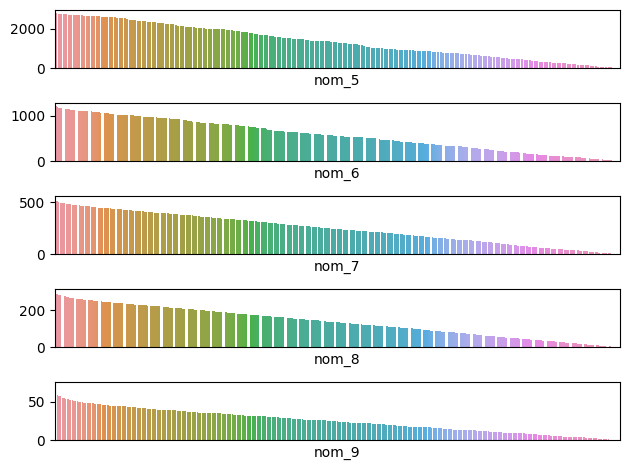

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

figure, axes = plt.subplots(nrows=5, ncols=1)
for i, col in enumerate(drop_cols):
    temp = train_data[col].value_counts()
    sns.barplot(x=temp.index, y=temp.values, ax=axes[i])
    axes[i].set_xticks([])
    
plt.tight_layout()
plt.show()

In [10]:
bin_map_tf = {'T':1, 'F':0}
bin_map_yn = {'Y':1, 'N':0}

In [11]:
train_data['bin_3'] = train_data['bin_3'].map(bin_map_tf)
train_data['bin_4'] = train_data['bin_4'].map(bin_map_yn)

In [13]:
# train_data = train_data.drop(columns=drop_cols)

In [12]:
train_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,1,Grandmaster,Freezing,a,R,qP,7,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,1,0,Red,Trapezoid,Snake,India,Oboe,1,Contributor,Freezing,k,K,dh,3,8,0
299996,0,0,0,0,1,Green,Trapezoid,Lion,Russia,Piano,2,Novice,Freezing,h,W,MO,3,2,0
299997,0,0,0,0,1,Blue,Star,Axolotl,Russia,Oboe,3,Novice,Boiling Hot,o,A,Bn,7,9,1


In [15]:
for feature in ordinal_features:
    unique_features = train_data[feature].unique()
    print("feature: ", feature)
    print(len(unique_features))
    print(unique_features)
    print(train_data[feature].value_counts())
    print('--------------------------------------')

feature:  ord_0
3
[2 1 3]
ord_0
1    194846
2     66438
3     38716
Name: count, dtype: int64
--------------------------------------
feature:  ord_1
5
['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_1
Novice         126583
Grandmaster     77428
Contributor     42871
Master          28053
Expert          25065
Name: count, dtype: int64
--------------------------------------
feature:  ord_2
6
['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']
ord_2
Freezing       99816
Lava Hot       63908
Boiling Hot    60627
Cold           33768
Hot            22227
Warm           19654
Name: count, dtype: int64
--------------------------------------
feature:  ord_3
15
['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_3
g    36405
l    36124
a    35276
k    28619
i    28048
h    24740
j    24647
f    22384
e    21331
b    11916
o    11320
d     7904
c     6944
n     4014
m      328
Name: count, dtype: int64
--------------------------------------
feature:  ord_4
26
['

ordinal feature들로 확인해볼 것들\
각 ordinal feature들에 대해서,
unique한 feature값들별로 1/0이 얼마나 있는지를 확인

1의 값 비율이 많은 feature값들 기준으로 정렬한 후에 이를 수치형으로 변환할 수도 있음\
아니면 그냥 feature값들 이름으로 해석해서 수치형으로 변환

Index([1, 2, 3], dtype='int64', name='ord_0')
target       0      1  ratio_target_1
ord_0                                
1       140646  54200        0.278168
2        44202  22236        0.334688
3        23388  15328        0.395909
target       0      1  ratio_target_1
ord_0                                
1       140646  54200        0.278168
2        44202  22236        0.334688
3        23388  15328        0.395909
{1: 1, 2: 2, 3: 3}


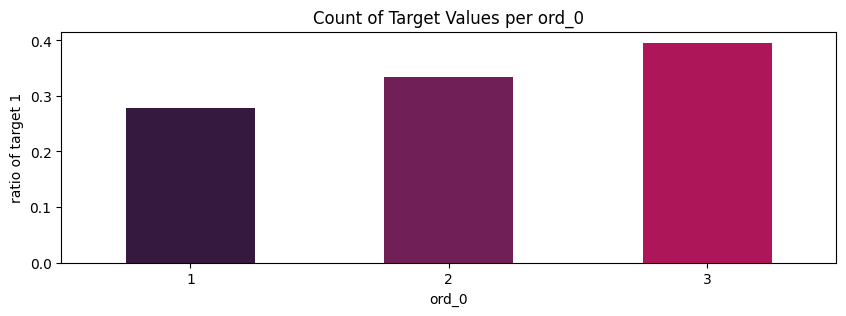

Index(['Contributor', 'Expert', 'Grandmaster', 'Master', 'Novice'], dtype='object', name='ord_1')
target           0      1  ratio_target_1
ord_1                                    
Contributor  30930  11941        0.278533
Expert       17115   7950        0.317175
Grandmaster  46156  31272        0.403885
Master       18092   9961        0.355078
Novice       95943  30640        0.242055
target           0      1  ratio_target_1
ord_1                                    
Novice       95943  30640        0.242055
Contributor  30930  11941        0.278533
Expert       17115   7950        0.317175
Master       18092   9961        0.355078
Grandmaster  46156  31272        0.403885
{'Novice': 1, 'Contributor': 2, 'Expert': 3, 'Master': 4, 'Grandmaster': 5}


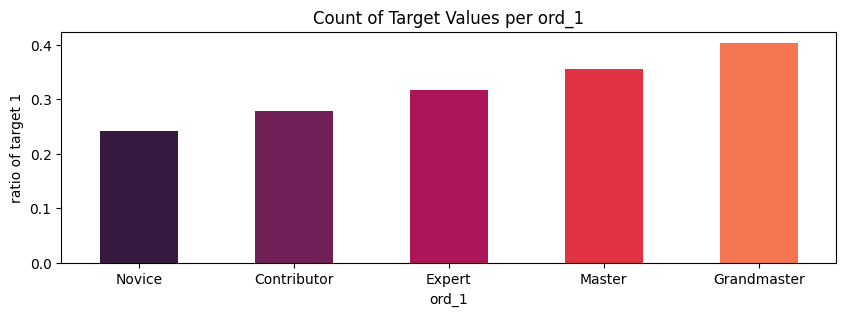

Index(['Boiling Hot', 'Cold', 'Freezing', 'Hot', 'Lava Hot', 'Warm'], dtype='object', name='ord_2')
target           0      1  ratio_target_1
ord_2                                    
Boiling Hot  38743  21884        0.360961
Cold         25060   8708        0.257877
Freezing     77336  22480        0.225214
Hot          14974   7253        0.326315
Lava Hot     38145  25763        0.403126
Warm         13978   5676        0.288796
target           0      1  ratio_target_1
ord_2                                    
Freezing     77336  22480        0.225214
Cold         25060   8708        0.257877
Warm         13978   5676        0.288796
Hot          14974   7253        0.326315
Boiling Hot  38743  21884        0.360961
Lava Hot     38145  25763        0.403126
{'Freezing': 1, 'Cold': 2, 'Warm': 3, 'Hot': 4, 'Boiling Hot': 5, 'Lava Hot': 6}


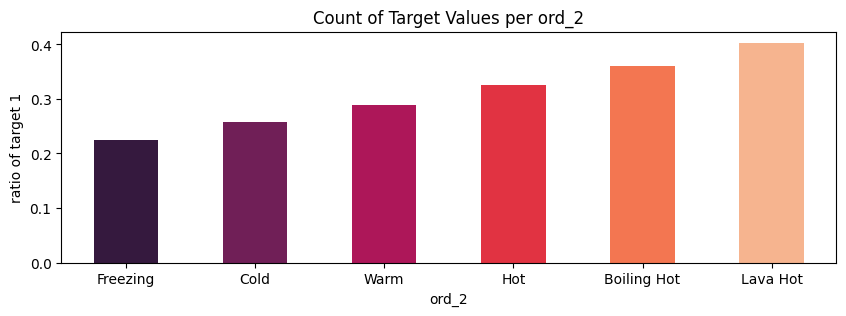

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o'],
      dtype='object', name='ord_3')
target      0      1  ratio_target_1
ord_3                               
a       27988   7288        0.206599
b        9289   2627        0.220460
c        5326   1618        0.233007
d        5996   1908        0.241397
e       15794   5537        0.259575
f       16228   6156        0.275018
g       25859  10546        0.289685
h       17145   7595        0.306993
i       18788   9260        0.330148
j       16206   8441        0.342476
k       18167  10452        0.365212
l       22423  13701        0.379277
m         207    121        0.368902
n        2409   1605        0.399851
o        6411   4909        0.433657
target      0      1  ratio_target_1
ord_3                               
a       27988   7288        0.206599
b        9289   2627        0.220460
c        5326   1618        0.233007
d        5996   1908        0.241397
e       15794   5537   

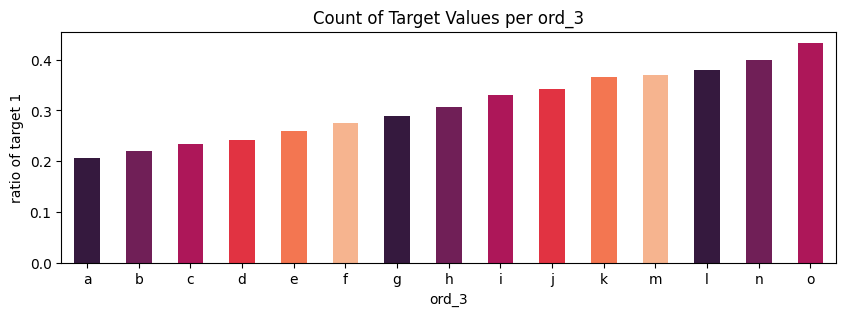

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='object', name='ord_4')
target      0     1  ratio_target_1
ord_4                              
A       14846  3412        0.186877
B        4944  1225        0.198574
C        2803   772        0.215944
D        3146   828        0.208354
E        8889  2414        0.213572
F        9086  2631        0.224546
G       14422  4477        0.236891
H        9615  3128        0.245468
I       10949  3695        0.252322
J        9445  3433        0.266579
K       10788  3910        0.266023
L       13677  5389        0.282650
M         115    44        0.276730
N        1489   677        0.312558
O        4045  1791        0.306888
P        8667  4172        0.324947
Q       10570  5355        0.336264
R       10971  5956        0.351864
S       12092  6783        0.359364
T        8980  5240        0.368495
U        7985  4790        

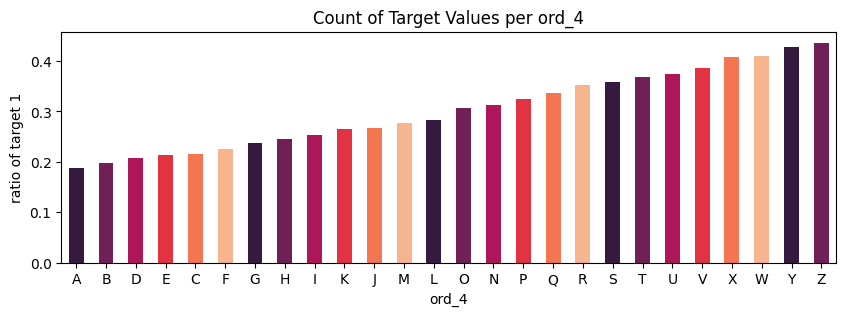

Index(['AP', 'Ai', 'Aj', 'BA', 'BE', 'Bb', 'Bd', 'Bn', 'CL', 'CM',
       ...
       'vq', 'vy', 'wu', 'wy', 'xP', 'xy', 'yN', 'yY', 'yc', 'zU'],
      dtype='object', name='ord_5', length=192)
target     0     1  ratio_target_1
ord_5                             
AP      2126   488        0.186687
Ai       751   142        0.159015
Aj       463    90        0.162749
BA       478   133        0.217676
BE      1253   285        0.185306
...      ...   ...             ...
xy      1275  1004        0.440544
yN       349   299        0.461420
yY       381   352        0.480218
yc       632   597        0.485761
zU      1302  1058        0.448305

[192 rows x 3 columns]
target     0     1  ratio_target_1
ord_5                             
Cl        27     1        0.035714
Ai       751   142        0.159015
Aj       463    90        0.162749
Kf       120    24        0.166667
CL      1744   378        0.178134
...      ...   ...             ...
wu      1188  1031        0.464624
ux        89

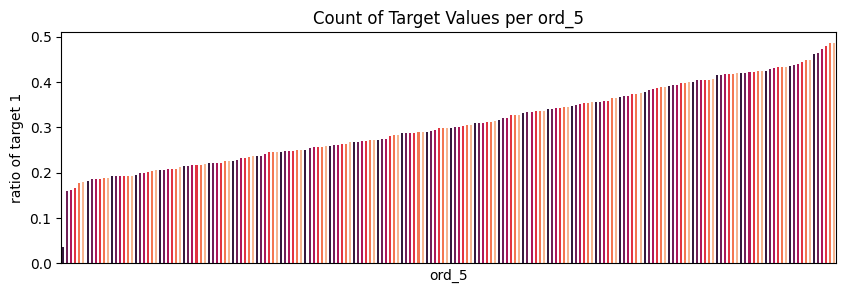

In [13]:
palette = sns.color_palette("rocket")

ordinal_features_mapping = {}

for feature in ordinal_features:
    count_df = train_data.groupby([feature, 'target']).size().unstack()
    count_df['ratio_target_1'] = count_df[1] / (count_df[0] + count_df[1])
    print(count_df.index)
    print(count_df)
    count_df_sorted = count_df.sort_values(by='ratio_target_1', ascending=True)
    print(count_df_sorted)
    temp_mapping = {} 
    ordinal_features_mapping[feature] = temp_mapping
    for i, v in enumerate(count_df_sorted.index):
        ordinal_features_mapping[feature][v] = i + 1
    print(ordinal_features_mapping[feature])
    ax = count_df_sorted['ratio_target_1'].plot(kind='bar', figsize=(10, 3), color=palette)
    plt.title(f'Count of Target Values per {feature}')
    if feature == 'ord_5':
        ax.set_xticks([])
    plt.xlabel(feature)
    plt.ylabel('ratio of target 1')
    plt.xticks(rotation=0)
    plt.show()

순서형 데이터 인코딩 전략
1. value별로 target 1 ratio 비율의 rank 값으로 변환
2. value별로 target 1 ration 값을 그대로 가져감 (target encoding)

In [14]:
for feature in ordinal_features:
    train_data[feature] = train_data[feature].map(ordinal_features_mapping[feature])

In [15]:
train_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,2,5,2,8,3,157,2,2,0
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,1,5,4,1,1,100,7,8,0
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,1,3,6,8,18,25,7,2,0
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,1,5,5,9,3,134,2,1,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,1,5,1,1,18,159,7,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,1,0,Red,Trapezoid,Snake,India,Oboe,1,2,1,11,10,107,3,8,0
299996,0,0,0,0,1,Green,Trapezoid,Lion,Russia,Piano,2,1,1,8,24,41,3,2,0
299997,0,0,0,0,1,Blue,Star,Axolotl,Russia,Oboe,3,1,5,15,1,6,7,9,1


In [136]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   bin_0   300000 non-null  int64 
 1   bin_1   300000 non-null  int64 
 2   bin_2   300000 non-null  int64 
 3   bin_3   300000 non-null  int64 
 4   bin_4   300000 non-null  int64 
 5   nom_0   300000 non-null  object
 6   nom_1   300000 non-null  object
 7   nom_2   300000 non-null  object
 8   nom_3   300000 non-null  object
 9   nom_4   300000 non-null  object
 10  ord_0   300000 non-null  int64 
 11  ord_1   300000 non-null  int64 
 12  ord_2   300000 non-null  int64 
 13  ord_3   300000 non-null  int64 
 14  ord_4   300000 non-null  int64 
 15  ord_5   300000 non-null  int64 
 16  day     300000 non-null  int64 
 17  month   300000 non-null  int64 
 18  target  300000 non-null  int64 
dtypes: int64(14), object(5)
memory usage: 45.8+ MB


In [16]:
nominal_features = [f'nom_{i}' for i in range(5)]
nominal_features

['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']

In [17]:
import numpy as np

In [18]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
for feature in nominal_features:
    encoder = OneHotEncoder()
    train_cat = encoder.fit_transform(np.array(train_data[feature]).reshape(-1,1))
    train_cat = train_cat.toarray()
#     print(train_cat.toarray())
#     print(encoder.categories_[0])
    train_cat = pd.DataFrame(train_cat, columns=[f'{feature}_'+col for col in encoder.categories_[0]])
    print(train_cat)
    train_data =train_data.drop(columns=feature)
    train_data = pd.concat([train_data, train_cat], axis=1)
print(train_data)

        nom_0_Blue  nom_0_Green  nom_0_Red
0              0.0          1.0        0.0
1              0.0          1.0        0.0
2              1.0          0.0        0.0
3              0.0          0.0        1.0
4              0.0          0.0        1.0
...            ...          ...        ...
299995         0.0          0.0        1.0
299996         0.0          1.0        0.0
299997         1.0          0.0        0.0
299998         0.0          1.0        0.0
299999         1.0          0.0        0.0

[300000 rows x 3 columns]
        nom_1_Circle  nom_1_Polygon  nom_1_Square  nom_1_Star  \
0                0.0            0.0           0.0         0.0   
1                0.0            0.0           0.0         0.0   
2                0.0            0.0           0.0         0.0   
3                0.0            0.0           0.0         0.0   
4                0.0            0.0           0.0         0.0   
...              ...            ...           ...         ...   
29

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 0 to 299999
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   bin_0             300000 non-null  int64  
 1   bin_1             300000 non-null  int64  
 2   bin_2             300000 non-null  int64  
 3   bin_3             300000 non-null  int64  
 4   bin_4             300000 non-null  int64  
 5   ord_0             300000 non-null  int64  
 6   ord_1             300000 non-null  int64  
 7   ord_2             300000 non-null  int64  
 8   ord_3             300000 non-null  int64  
 9   ord_4             300000 non-null  int64  
 10  ord_5             300000 non-null  int64  
 11  day               300000 non-null  int64  
 12  month             300000 non-null  int64  
 13  target            300000 non-null  int64  
 14  nom_0_Blue        300000 non-null  float64
 15  nom_0_Green       300000 non-null  float64
 16  nom_0_Red         300000 

In [28]:
train_data['month'].unique()

array([ 2,  8,  1,  4, 10,  3,  7,  9, 12, 11,  5,  6])

In [32]:
month_ratio = pd.crosstab(train_data['month'], train_data['target'])
month_ratio['ratio_target_1'] = month_ratio[1]/(month_ratio[0] + month_ratio[1])
month_ratio = month_ratio.sort_values(by='ratio_target_1', ascending=True)
display(month_ratio)
print(month_ratio.index)

month_encoding_map = {}
for m in train_data['month'].unique():
    month_encoding_map[m] = month_ratio.index.get_loc(m) + 1
print(month_encoding_map)

target,0,1,ratio_target_1
month,,,
2,34231,11074,0.244432
1,30402,10446,0.255729
3,29386,11481,0.280936
4,17510,7410,0.297352
5,7509,3486,0.317053
8,12596,6134,0.327496
7,13020,6847,0.344642
9,16274,8583,0.345295
10,14303,7809,0.353157


Index([2, 1, 3, 4, 5, 8, 7, 9, 10, 12, 11, 6], dtype='int64', name='month')
{2: 1, 8: 6, 1: 2, 4: 4, 10: 9, 3: 3, 7: 7, 9: 8, 12: 10, 11: 11, 5: 5, 6: 12}


In [33]:
day_ratio = pd.crosstab(train_data['day'], train_data['target'])
day_ratio['ratio_target_1'] = day_ratio[1]/(day_ratio[0] + day_ratio[1])
day_ratio = day_ratio.sort_values(by='ratio_target_1', ascending=True)
display(day_ratio)
print(day_ratio.index)

day_encoding_map = {}
for d in train_data['day'].unique():
    day_encoding_map[d] = day_ratio.index.get_loc(d) + 1
print(day_encoding_map)

target,0,1,ratio_target_1
day,,,
4,30239,10195,0.252139
5,12929,4858,0.273121
3,47694,18663,0.281251
2,50382,23933,0.322048
6,612,300,0.328947
1,44576,22568,0.336113
7,21804,11247,0.340292


Index([4, 5, 3, 2, 6, 1, 7], dtype='int64', name='day')
{2: 4, 7: 7, 5: 2, 4: 1, 3: 3, 1: 6, 6: 5}


In [34]:
train_data['day'] = train_data['day'].map(day_encoding_map)
train_data['month'] = train_data['month'].map(month_encoding_map)

In [163]:
train_data['day'] = train_data['day'].map(day_encoding_map)
train_data['month'] = train_data['month'].map(month_encoding_map)

In [35]:
train_data[['day', 'month']]

,day,month
0,4,1
1,7,6
2,7,1
3,4,2
4,7,6
...,...,...
299995,3,6
299996,3,1
299997,7,8
299998,3,6


In [38]:
x_cols = [col for col in train_data.columns if col != 'target']
train_data = train_data[x_cols + ['target']]
print(train_data.head())

   bin_0  bin_1  bin_2  bin_3  bin_4  ord_0  ord_1  ord_2  ord_3  ord_4  ...  \
0      0      0      0      1      1      2      5      2      8      3  ...   
1      0      1      0      1      1      1      5      4      1      1  ...   
2      0      0      0      0      1      1      3      6      8     18  ...   
3      0      1      0      0      1      1      5      5      9      3  ...   
4      0      0      0      0      0      1      5      1      1     18  ...   

   nom_3_China  nom_3_Costa Rica  nom_3_Finland  nom_3_India  nom_3_Russia  \
0          0.0               0.0            1.0          0.0           0.0   
1          0.0               0.0            0.0          0.0           1.0   
2          0.0               0.0            0.0          0.0           1.0   
3          0.0               0.0            0.0          0.0           0.0   
4          0.0               0.0            0.0          0.0           0.0   

   nom_4_Bassoon  nom_4_Oboe  nom_4_Piano  nom_4_T

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 0 to 299999
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   bin_0             300000 non-null  int64  
 1   bin_1             300000 non-null  int64  
 2   bin_2             300000 non-null  int64  
 3   bin_3             300000 non-null  int64  
 4   bin_4             300000 non-null  int64  
 5   ord_0             300000 non-null  int64  
 6   ord_1             300000 non-null  int64  
 7   ord_2             300000 non-null  int64  
 8   ord_3             300000 non-null  int64  
 9   ord_4             300000 non-null  int64  
 10  ord_5             300000 non-null  int64  
 11  day               300000 non-null  int64  
 12  month             300000 non-null  int64  
 13  nom_0_Blue        300000 non-null  float64
 14  nom_0_Green       300000 non-null  float64
 15  nom_0_Red         300000 non-null  float64
 16  nom_1_Circle      300000 